# Agenda today:
1. Overview of NLP
2. Model Building Remains Consistent
2. Pre-Processing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
3. Feature Engineering for NLP
    - Bag-of-Words
    - Count Vectorizer
    - Term frequency-Inverse Document Frequency (tf-idf)


In [388]:
# This is always a good idea
%load_ext autoreload
%autoreload 2

# This is always a good idea
%load_ext autoreload
%autoreload 2

from src.student_caller import one_random_student
from src.student_list import student_first_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Overview of NLP
NLP allows computers to interact with text data in a structured and sensible way. In short, we will be breaking up series of texts into individual words (or groups of words), and isolating the words with **semantic value**.  We will then compare texts with similar distributions of these words, and group them together.

In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Speech recognition and audio processing 
- Classifying documents 

Here is an example that uses some of the tools we use in this notebook.  
  -[chi_justice_project](https://chicagojustice.org/research/justice-media-project/)  
  -[chicago_justice classifier](https://github.com/chicago-justice-project/article-tagging/blob/master/lib/notebooks/bag-of-words-count-stemmed-binary.ipynb)

We will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

We will also introduce you to [**NLTK**](https://www.nltk.org/) (Natural Language Toolkit), which will be our main tool for engaging with textual data.

# NLP process 
<img src="img/nlp_process.png" style="width:1000px;">

# 2. Model Building Principles Remain Consistent

In [389]:
#!pip install nltk
# conda install -c anaconda nltk

We will be working with a dataset which includes both **satirical** (The Onion) and real news (Reuters) articles. 

We refer to the entire set of articles as the **corpus**.  

In [390]:
# Let's import our corpus. 
import pandas as pd


In [391]:
#__SOLUTION__
import pandas as pd

corpus = pd.read_csv('data/satire_nosatire.csv')


Our goal is to detect satire, so our target class of 1 is associated with The Onion articles.  

![the_onion](img/the_onion.jpeg) ![reuters](img/reuters.png)

Each article in the corpus is refered to as a **document**.

In [392]:
# How many documents are there in the corpus?

In [393]:
#__SOLUTION__
corpus.shape

(1000, 2)

In [161]:
# What is the class balance?

In [162]:
#__SOLUTION__
# It is a balanced dataset with 500 documents of each category. 
corpus.target.value_counts()

1    500
0    500
Name: target, dtype: int64

In [163]:
# Let's look at some example texts from both categories

# Category 1


In [164]:
# Category 0

In [45]:
#__SOLUTION__
# Let's look at some example texts from both categories
corpus[corpus.target==1].sample().body.values

corpus[corpus.target==0].sample().body.values

array([' A powerful Iranian council approved an anti-money laundering bill on Saturday, state media reported, a major step towards reforms that would bring Iran into line with global norms and could facilitate foreign trade in the face of U.S sanctions. Iran has been trying to implement standards set by the Financial Action Task Force (FATF), an inter-governmental organisation that underpins the fight against money laundering and terrorist financing. Foreign businesses say Iran’s compliance with FATF standards and its removal from the organisation’s blacklist are essential if they are to increase investment, especially after reimposition of the U.S. sanctions on Tehran. However, Iranian hardliners have opposed passing legislation toward compliance with the FATF, arguing it could hamper Iranian financial support for allies such as Lebanon’s Hezbollah, which the United States lists as a terrorist organisation. Parliament last year passed the anti-money laundering bill, one of four amendm

Let's think about our types of error and the use cases of being able to correctly separate satirical from authentic news. What type of error should we decide to optimize our models for?  

In [165]:
# Help me fill in the blanks:

# Pass in the body of the documents as raw text
X = None
y = None

In [177]:
#__SOLUTION__
X = corpus.body
y = corpus.target


In [178]:
X_train, X_test, y_train, y_test = None, None, None, None

In [179]:
#__SOLUTION__
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)
X_train

29     “Did you see those golden globes?” an excited ...
535     The most senior bankers to face criminal char...
695     Five Louisiana children travelling to Disney ...
557     A U.S. guided-missile destroyer sailed near d...
836     U.S. commanders planning for the withdrawal o...
                             ...                        
106    The visiting contingent of communist Chinese c...
270    Manufacturers of the newly unveiled robot call...
860     Britain’s Royal Mail apologised on Friday aft...
435    Kim Jong-Un set up an amazing fireworks show f...
102    Thanks to the constant lies and closed curtain...
Name: body, Length: 800, dtype: object

In [195]:
# For demonstration purposes, we will perform a secondary train test split. In practice, we will apply a pipeline.

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)


In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

# A new preprocessing tool!
tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")

# Like always, we are fitting only on the training set
X_t_vec = None
# Here is our new dataframe of predictors
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())

X_train_vec.head()

AttributeError: 'NoneType' object has no attribute 'toarray'

In [219]:
#__SOLUTION__
from sklearn.feature_extraction.text import TfidfVectorizer

# A new preprocessing tool!
tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")

# Like always, we are fitting only on the training set
X_t_vec = tfidf.fit_transform(X_t)
# Here is our new dataframe of predictors
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())
X_t_vec.head()

,a,aaaaaaah,aaaaaah,aaaaargh,aaargh,aah,aahing,aap,aapl,aaron,...,zooming,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss
0,0.118115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.062207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.081322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.190319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.104993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# That's a lot of columns
X_t_vec.shape

(640, 19118)

### We can push this data into any of our classification models


In [221]:
# Code here

In [222]:
#__SOLUTION__
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_t_vec, y_t)

# Perfect on the training set. 
log_r.score(X_t_vec, y_t)

1.0

# We proceed as usual:
    - Transform the validation set
    - Score the validation set
    - Plot a confusion matrix to check out the performance on different types of errors
 

In [223]:
# your code here

# Transform X_val
X_val_vec = None

# Score val
y_hat = None

# Plot confusion matrix


0.96875


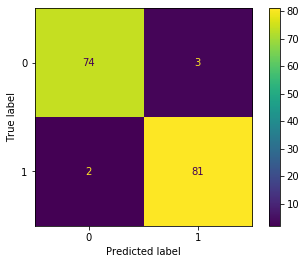

In [224]:
#__SOLUTION__
# Transform X_val
X_val_vec = tfidf.transform(X_val)
y_hat = log_r.predict(X_val_vec)
# Score val

print(log_r.score(X_val_vec, y_val))

# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
# we should have a lot of true positive and true negatives
plot_confusion_matrix(log_r, X_val_vec, y_val)

In [225]:
#__SOLUTION__
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")
lr = LogisticRegression()
pipeline = make_pipeline(tfidf, lr)
pipeline

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...ern="([a-zA-Z]+(?:'[a-z]+)?)",
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_inte

In [226]:
#__SOLUTION__
cross_val_score(pipeline, X_train, y_train).mean()


0.9737499999999999

In [227]:
#__SOLUTION__

pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...ern="([a-zA-Z]+(?:'[a-z]+)?)",
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_inte

In [228]:
#__SOLUTION__

pipeline.score(X_test, y_test)
y_hat = pipeline.predict(X_test)

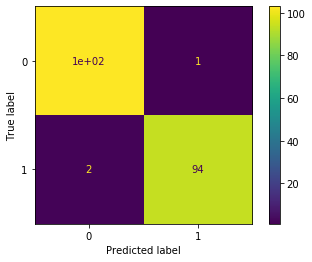

In [229]:
#__SOLUTION__

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_test, y_test)

# 3 Preprocessing

### Tokenization 

In order to convert the texts into data suitable for machine learning, we need to break down the documents into smaller parts. 

The first step in doing that is **tokenization**.

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

Let's consider the first document in our corpus:

In [230]:
first_document = corpus.iloc[0].body

There are many ways to tokenize our document. 

It is a long string, so the first way we might consider is to split it by spaces.

In [ ]:
# code

In [ ]:
#__SOLUTION__
first_document.split()[:30]

In [ ]:
print(f'{one_random_student(mccalister)}, in creating tokens in this way, what problems do we see?')

#### Chat out some problems (don't look down)

<img src="https://media.giphy.com/media/ZaiC2DYDRiqhQ269nz/giphy.gif" style="width:1500px;">

We are trying to create a set of tokens with **high semantic value**.  In other words, we want to isolate text which best represents the meaning in each document.  


## Common text cleaning tasks:  
  1. remove capitalization  
  2. remove punctuation  
  3. remove stopwords  
  4. remove numbers

We could manually perform all of these tasks with string operations

## Capitalization

When we create our matrix of words associated with our corpus, **capital letters** will mess things up.  The semantic value of a word used at the beginning of a sentence is the same as that same word in the middle of the sentence.  In the two sentences:

sentence_one =  "Excessive gerrymandering in small counties suppresses turnout."   
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."  

Excessive has the same semantic value, but will be treated as two separate tokens because of capitals.

In [ ]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."


In [232]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."

In [233]:
#__SOLUTION__
excessive = sentence_one.split(' ')[0]
Excessive = sentence_two.split(' ')[-2]
print(excessive, Excessive)
excessive == Excessive

Excessive excessive


False

### Let's fill in the list comprehension below to manually and remove capitals from the 1st document

In [239]:
manual_cleanup = None

In [278]:
#__SOLUTION__
## Manual removal of capitals

manual_cleanup = [token.lower() for token in first_document.split(' ')]
manual_cleanup[:25]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,']

In [279]:
print(f"Our initial token set for our first document is {len(manual_cleanup)} words long")

Our initial token set for our first document is 154 words long


In [280]:
print(f"Our initial token set for our first document has {len(set(first_document.split()))} unique words")

Our initial token set for our first document has 117 unique words


In [281]:
print(f"After remove caps, our first document has {len(set(manual_cleanup))} unique words")

After remove caps, our first document has 115 unique words


## Punctuation

Like capitals, splitting on white space will create tokens which include punctuation that will muck up our semantics.  

Returning to the above example, 'gerrymandering' and 'gerrymandering.' will be treated as different tokens.

# Different ways to strip punctuation

In [318]:
# Strip with translate

## Manual removal of punctuation
# string library!
import string

string.punctuation
punctuation = string.punctuation + '“'
punctuation
# string.ascii_letters



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“'

In [319]:
#__SOLUTION__
# Code here
no_punc = [word.translate(word.maketrans("","", punctuation)) for word in manual_cleanup]
no_punc

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb',
 'jesus',
 'we',
 'can’t',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once—we',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next”',
 'said',
 '53yearold',
 'gregory',
 'birch',
 'of',
 'naperville',
 'il',
 'echoing',
 'the',
 'concerns',
 'of',
 '323',
 'million',
 'americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 'this',
 'is',


# Strip with regex

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

In [323]:
manual_cleanup

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb',
 '“jesus',
 'we',
 'can’t',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once—we',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next”',
 'said',
 '53yearold',
 'gregory',
 'birch',
 'of',
 'naperville',
 'il',
 'echoing',
 'the',
 'concerns',
 'of',
 '323',
 'million',
 'americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 '“this',
 'is'

In [356]:
# Test out a word and search it



In [379]:
# Create a pattern that matches only letters to strip punctuation

# Code here

In [380]:
#__SOLUTION__
pattern = r"[a-zA-Z]+"

manual_cleanup = [re.search(pattern, word).group(0) for word in manual_cleanup if re.search(pattern, word)]

In [381]:
#__SOLUTION__

# Better solution 
import re

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
[re.match(regex_pattern, word).group(0) for word in manual_cleanup]

['noting',
 'resignation',
 'james',
 'mattis',
 'secretary',
 'defense',
 'marked',
 'ouster',
 'third',
 'top',
 'administration',
 'official',
 'less',
 'three',
 'weeks',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'unsure',
 'many',
 'former',
 'trump',
 'staffers',
 'could',
 'safely',
 'reabsorb',
 'jesus',
 'take',
 'back',
 'assholes',
 'need',
 'time',
 'process',
 'one',
 'get',
 'next',
 'said',
 'yearold',
 'gregory',
 'birch',
 'naperville',
 'il',
 'echoing',
 'concerns',
 'million',
 'americans',
 'also',
 'noting',
 'country',
 'truly',
 'beginning',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 'sustainable',
 'handle',
 'maybe',
 'one',
 'two',
 'former',
 'members',
 'trump',
 'inner',
 'circle',
 'remainder',
 'year',
 'country',
 'limits',
 'us',
 'populace',
 'confirmed',
 'could',
 'handle',
 'pieces',
 'shit',
 'trying',
 'rejoin',
 'society']

In [382]:
print(f"After removing punctuation, our first document has {len(set(manual_cleanup))} unique words")

After removing punctuation, our first document has 75 unique words


### Stopwords

Stopwords are the **filler** words in a language: prepositions, articles, conjunctions. They have low semantic value, and almost always need to be removed.  

Luckily, NLTK has lists of stopwords ready for our use.

In [387]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [367]:
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Let's see which stopwords are present in our first document.

In [ ]:
stops = [token for token in manual_cleanup if token in stopwords.words('english')]


In [368]:
stops = [token for token in manual_cleanup if token in stopwords.words('english')]
stops[:10]

['that', 'the', 'of', 'as', 'of', 'the', 'of', 'the', 'in', 'than']

In [369]:
print(f'There are {len(stops)} stopwords in the first document')

There are 68 stopwords in the first document


In [370]:
print(f'That is {len(stops)/len(manual_cleanup): .2%} of our text')

That is  44.44% of our text


Let's also use the **FreqDist** tool to look at the makeup of our text before and after removal

In [371]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

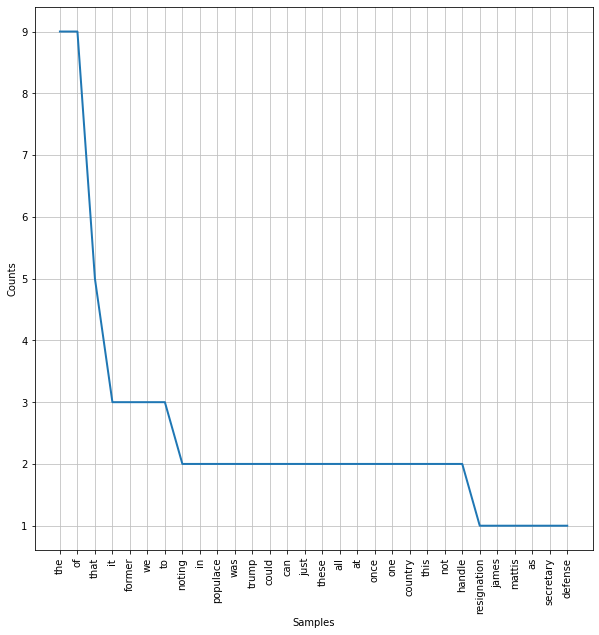

In [372]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)


In [373]:
manual_cleanup = [token for token in manual_cleanup if token not in stopwords.words('english')]

In [374]:
# We can also customize our stopwords list

custom_sw = stopwords.words('english')
custom_sw.extend(["i'd","say"] )
custom_sw[-10:]

['wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "i'd",
 'say']

In [375]:
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]


In [376]:
print(f'After removing stopwords, there are {len(set(manual_cleanup))} unique words left')

After removing stopwords, there are 75 unique words left


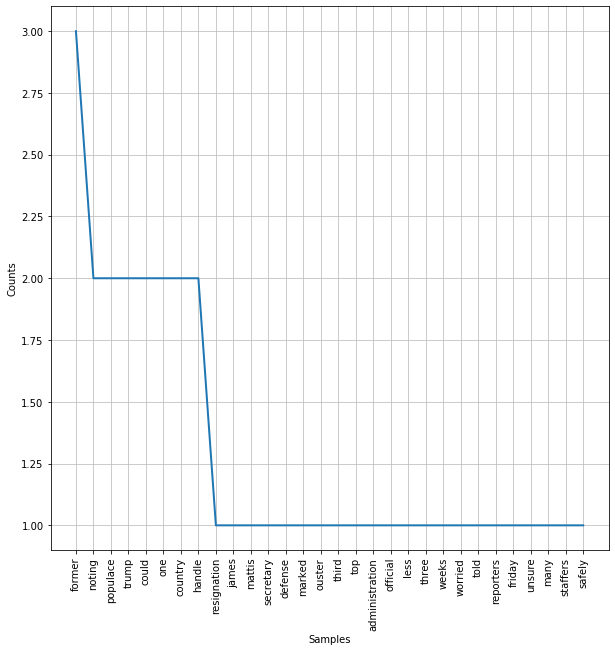

In [377]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [378]:
print(f'''{one_random_student(mccalister)}, based on the frequency plot above, 
    add some custome stopwords to our list, and remove them from our document. 
    Print out the frequency plot to confirm they have been removed.''')

NameError: name 'mccalister' is not defined

In [ ]:
# Code

In [ ]:
#__SOLUTION__
custom_sw.extend(['could', 'one'])
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]

fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

#### Numbers

Numbers also usually have low semantic value. Their removal can help improve our models. 

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

Other helpful resources:
  - https://regexcrossword.com/
  - https://www.regular-expressions.info/tutorial.html

We can use regex to isolate numbers



# Individual Code Exercise:  
Individually, test out different regex patterns to isolate numerical values in the first document.


In [ ]:
first_document

In [ ]:
import re
pattern = 'a regex pattern'
number = re.findall( pattern, first_document)
number

In [ ]:
#__SOLUTION__
import re

# 1 or more digits
pattern = '\d+'

number = re.findall( pattern, first_document)
number

In [ ]:
number

Sklearn and NLTK provide us with a suite of **tokenizers** for our text preprocessing convenience.

In [ ]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer


In [ ]:
first_document

In [ ]:
import re
re.findall(r"([a-zA-Z]+(?:'[a-z]+)?)" , "I'd")

In [ ]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]
first_doc[10]

In [ ]:
print(f'We are down to {len(set(first_doc))} unique words')

# Stemming

Most of the semantic meaning of a word is held in the root, which is usually the beginning of a word.  Conjugations and plurality do not change the semantic meaning. "eat", "eats", and "eating" all have essentially the same meaning packed into eat.   

Stemmers consolidate similar words by chopping off the ends of the words.

![stemmer](img/stemmer.png)

There are different stemmers available.  The two we will use here are the **Porter** and **Snowball** stemmers.  A main difference between the two is how agressively it stems, Porter being less agressive.

In [ ]:
from nltk.stem import *

p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language="english")

In [ ]:
p_stemmer.stem(first_doc[0])

In [ ]:
s_stemmer.stem(first_doc[0])

In [ ]:
for word in first_doc:
    p_word = p_stemmer.stem(word)
    s_word = s_stemmer.stem(word)
    
    if p_word != s_word:
        print(p_word, s_word)
    

In [ ]:
first_doc = [p_stemmer.stem(word) for word in first_doc]

In [ ]:
fdist = FreqDist(first_doc)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [ ]:
print(f'Stemming did not reduce our token count: {len(set(first_doc))} unique tokens')

# Lemming

Lemming is a bit more sophisticated that the stem choppers.  Lemming uses part of speech tagging to determine how to transform a word.  In that 
Lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.  It can handle words such as "mouse", whose plural "mice" the stemmers would not lump together with the original. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

![lemmer](img/lemmer.png)


In [ ]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 


In [ ]:
print(f'Mice becomes: {lemmatizer.lemmatize("mice")}')
print(f'Noting becomes: {lemmatizer.lemmatize(first_doc[0])}')

In [ ]:
# However, look at the output below:
    
sentence = "He saw the trees get sawed down"
lemmed_sentence = [lemmatizer.lemmatize(token) for token in sentence.split(' ')]
lemmed_sentence

In [ ]:
one_random_student(mccalister)
# What should have changed form but didn't?

Lemmatizers depend on POS tagging, and defaults to noun.

In [ ]:
one_random_student(mccalister)
# What do you think will happen if we feed another POS to saw?

With a little bit of work, we can POS tag our text.

In [ ]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]
corpus.loc[0].body

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

In [ ]:
from nltk import pos_tag
# Use nltk's pos_tag to tag our words
# Does a pretty good job, but does make some mistakes
first_doc_tagged = pos_tag(first_doc)
first_doc_tagged

In [ ]:
# Then transform the tags into the tags of our lemmatizers
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
first_doc_tagged = [(token[0], get_wordnet_pos(token[1]))
             for token in first_doc_tagged]

In [ ]:
first_doc_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in first_doc_tagged]

In [ ]:
first_doc_lemmed[:10]

In [ ]:
print(f'There are {len(set(first_doc_lemmed))} unique lemmas')

In [ ]:
fdist = FreqDist(first_doc_lemmed)
plt.figure(figsize=(10,10))
fdist.plot(30)

## Part 3. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called **Bag-of-words (BoW)**. 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:

![document term matrix](img/document_term_matrix.png)

In [ ]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer()
X = vec.fit_transform([" ".join(first_doc_lemmed)])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

That is not very exciting for one document. The idea is to make a document term matrix for all of the words in our corpus.

In [ ]:
corpus

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

Our document term matrix gets bigger and bigger, with more and more zeros, becoming sparser and sparser.

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

We can set upper and lower limits to the word frequency.

In [ ]:
corpus.body

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2], min_df=2, max_df=25)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

- TF (Term Frequency)
term frequency is the frequency of the word in the document divided by the total words in the document.

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number\ of\ documents}{num\ of\ documents\ containing\ w})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = tf_vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = tf_vec.get_feature_names())
df.head()

In [ ]:
corpus.iloc[313].body

In [ ]:
df.iloc[313].sort_values(ascending=False)[:10]

Let's compare the tfidf to the count vectorizer output for one document.

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

In [ ]:
df_cv.iloc[313].sort_values(ascending=False)[:10]

The tfidf lessoned the importance of some of the more common words, including a stopword which "also" which didn't make it into the stopword list.

It also assigns "nerds" more weight than power.  

In [ ]:
print(f'Nerds only shows up in document 313: {len(df_cv[df.nerds!=0])}')
print(f'Power shows up in {len(df_cv[df.power!=0])}')

In [ ]:
tf_vec.vocabulary_

# Pair: 

For a final exercise, work through in pairs the following exercise.

Create a document term matrix of the 1000 document corpus.  The vocabulary should have no stopwords, no numbers, no punctuation, and be lemmatized.  The Document-Term Matrix should be created using tfidf.

In [ ]:
#__SOLUTION__
corpus = pd.read_csv('data/satire_nosatire.csv')


In [ ]:
#__SOLUTION__
def doc_preparer(doc, stop_words=custom_sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)


In [ ]:
#__SOLUTION__
docs = [doc_preparer(doc) for doc in corpus.body]

In [ ]:
#__SOLUTION__
tf_idf = TfidfVectorizer(min_df = .05)
X = tf_idf.fit_transform(docs)

df = pd.DataFrame(X.toarray())
df.columns = tf_idf.vocabulary_
df.head()